In [247]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pandas as pd
from scipy.stats import lognorm
from scipy.stats import norm

## Question 1

In [248]:
#LCG function to create U(0,1) random variables
########################
#Inputs:
#n - number of RVs to create
#z0 - seed
#m- modulus
#a-multiplier
#c-constant additive term
#Outputs:
#array of n rows containing (U,z)

def LCG(n, z0, m, a, c):
    i=0
    u=0
    out=np.empty([n, 2])
    z=z0
    while i<=n-1:
        z=(a*z+c)%m
        out[i]=[z/m,z]
        i+=1
    return out
        
        
    


In [249]:
########################
#Uniform Random number generator on a specified interval
###############################
#Input
#U - a float betweek (0,1)
#a,b - bounds of interval
#Output:
# x - uniform RV on (a,b)  
def UniformAB(U, a, b):
    x=(b-a)*U+a
    return x

In [250]:
#Initialise LCG
z0=568
m=4096
a=3649
c=1581



In [251]:
##################################
#Generate an ECDF from data
############################
#Input: data array
#Output: ECDF array
def generateECDF(data):
    dataSort=np.sort(data, axis=None)
    n=len(data)
    ECDF=np.empty(n)
    for i in range(len(dataSort)):
        x=(1/n)*(i+1)
        ECDF[i]=x
        i+=1
    return ECDF

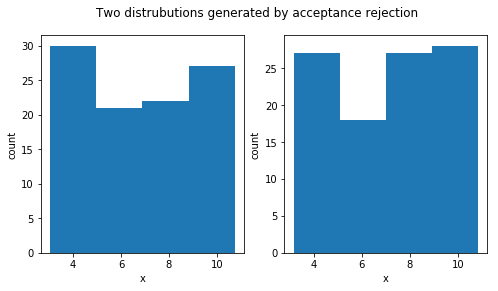

In [252]:


######
#Generating RV by acceptance rejection on given f
############
ntotal=100
z=z0
A=3
B=11
K=35/202

reps=2
out=np.empty((reps, ntotal))

def f(x):
    if x>=3 and x<6:
        y=(-x+26)/202
    if x>=6:
        y=(3*x+2)/202
    return y



for r in range(reps):
    for i in range(ntotal):
        accept=0
        x=0
        while accept==0:
            LCGData=LCG(1, z, m, a, c)
            U1=LCGData[:,0]
            z=LCGData[:,1]
            U1=UniformAB(U1,A,B)
            LCGData=LCG(1, z, m, a, c)
            U2=LCGData[:,0]
            z=LCGData[:,1]
            U2=UniformAB(U2,0,K)
            if U2<=f(U1):
                accept=1
                x=U1
        out[r,i]=x
        
#f=lambda x: (1/(2*np.pi)+np.sin(x)/(4*np.pi))

fig=plt.figure(figsize=(8, 4))
for r in range(reps):
    ax=fig.add_subplot(1, reps, r+1)
    ax=plt.hist(out[r, :], bins=4)
    plt.xlabel('x')
    plt.ylabel('count')
plt.suptitle('Two distrubutions generated by acceptance rejection')
plt.savefig('Q1.eps')
    

## Question 2

In [36]:
data=pd.read_csv('PS2Data2018.csv', sep=',', header=None)
data.head(5)

,0
0,6.895146
1,6.656261
2,8.309991
3,14.654556
4,6.705821


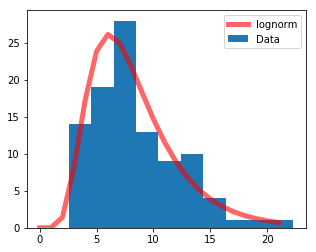

In [287]:
#Plotting the histogram of x and lognormal distribution
x=np.arange(0,22)
fig=plt.figure(figsize=(5,4))
plt.hist(data.iloc[:, 0], bins=10, label='Data')
plt.plot(x, 205*lognorm.pdf(x, s=0.461, scale=np.exp(2.02)), 'r-', lw=5, alpha=0.6, label='lognorm')
plt.legend()
plt.savefig('Q2.eps')





'mean: 2.0232479957494762'

'sd: 0.4607002361170655'

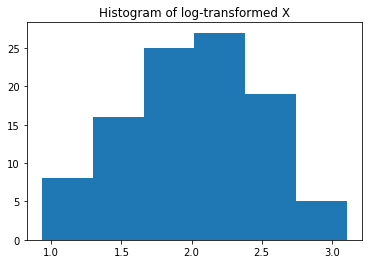

In [312]:
#Log transform the data


Y=np.log(data.iloc[:,0])

#Compute parameters
mu=np.mean(Y)
sigma=np.std(Y, ddof=1)
display('mean: '+str(np.mean(Y)))
display('sd: '+ str(np.std(Y)))


#Plot histogram
plt.hist(Y, bins=6)
plt.title('Histogram of log-transformed X')
plt.savefig('Q2b.eps')

In [294]:
O

(array([ 8., 16., 25., 27., 19.,  5.]),
 array([0.9356135 , 1.29703549, 1.65845747, 2.01987946, 2.38130144,
        2.74272343, 3.10414541]),
 <a list of 6 Patch objects>)

## Chi^2 test

'chi2, df:(2.969724324675645, 3)'

'chi2 at 0.05 = 7.815'

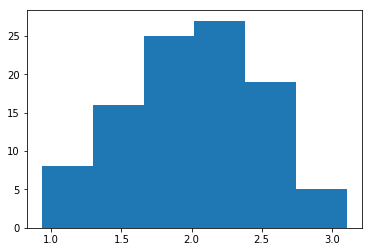

In [315]:
k=6  #Number of bins
#Generate the bin counts for oberved
O=plt.hist(Y, bins=int(k))

y_min, y_max=np.min(Y), np.max(Y)

#Initialise array for Expected
E=np.empty(int(k))
x=y_min
binwidth=(y_max-y_min)/k
#Iterate through bins of width binwidth
for i in range(int(k)):
    E[i]=100*(norm.cdf(x+binwidth, loc=mu, scale=sigma)-norm.cdf(x, loc=mu, scale=sigma))  #Compute n*p
    x=x+binwidth
chi2=np.sum(np.divide(((O[0]-E)**2),E))

df=k-1-2
display('chi2, df:'+str((chi2, df)))
display('chi2 at 0.05 = 7.815')

## KS Test

In [316]:
# KS Test
#Generate an ECDF for the data
ECDFData=generateECDF(Y)
ECDFData=ECDFData.reshape(100,1)
Y_sort=np.sort(Y.values)
#Compute the distance variables of |Fn(x)-F(x)|

DMinus=np.empty(100)
DPlus=np.empty(100)
for i in range(100):
    if i==0:
        DMinus[i]=(i+1)/100
    else:
        DMinus[i]=np.abs((i)/100-norm.cdf(Y_sort[i], loc=mu, scale=sigma)) #Absolute value for magnitude of distance
    DPlus[i]=np.abs(norm.cdf(Y_sort[i], loc=mu, scale=sigma)-(i+1)/100)

DMinus=DMinus.reshape(100,1)
        
DPlus=DPlus.reshape(100,1)

#Combine D+, D- into an array
D=np.concatenate((DPlus, DMinus), axis=1)

#Find maximum of D
DMax=np.max(D)
display('D='+str(DMax))

#Compute test statistic from DMax
KSStat=round((np.sqrt(len(Y))+0.12+0.11/np.sqrt(len(Y)))*DMax, 2)
display('KS test statistic='+str(KSStat))
display('D crit:' ,1.36/np.sqrt(50))


'D=0.05171714338495775'

'KS test statistic=0.52'

'D crit:'

0.19233304448274094

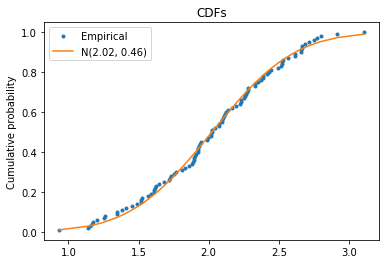

In [317]:
#Plot CDF

plt.plot(Y_sort, ECDFData, '.',label='Empirical' )
plt.plot(Y_sort, norm.cdf(Y_sort, mu, sigma), label='N(2.02, 0.46)')
plt.legend()
plt.ylabel('Cumulative probability')
plt.title('CDFs')
plt.savefig('Q2b_cdfs.eps')

## Q4

In [306]:
#Import CompletionTimes generated by Arena
SimData=pd.read_csv('CompletionTimes.txt', sep=' ', header=None)
SimData=SimData.iloc[:,0]
SimData

0     14.753682
1     14.557172
2     13.288238
3     17.768373
4     13.940708
5     15.655738
6     14.929498
7     14.569267
8     12.236390
9     14.956773
10    12.553065
11    15.285912
12    13.150169
13    14.791562
14    15.292317
15    12.455574
16    16.799275
17    15.163891
18    12.764737
19    11.655882
20    14.839958
21    12.781412
22    13.313719
23    15.620318
24    14.644385
25    15.842971
26    14.176126
27    12.754019
28    15.247720
29    11.333558
        ...    
70    13.589001
71    14.038922
72    12.861236
73    14.481218
74    15.315151
75    13.656520
76    11.424115
77    14.377414
78    15.267581
79    11.364257
80    14.481791
81    13.136415
82    13.894241
83    16.431418
84    10.347356
85    17.177906
86    14.682347
87    16.898636
88    17.886521
89    15.084363
90    10.579500
91    15.865151
92    14.236092
93    17.394396
94    11.306292
95    13.387777
96    13.201110
97    18.239832
98    17.520486
99    10.214801
Name: 0, Length: 100, dt

In [311]:
prop=np.sum(SimData>15)/len(SimData)
prop

0.34